In [ ]:
import tensorflow as tf

In [ ]:
function ClickConnect(){
  console.log("Clicking on the connect button");
  document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)

SyntaxError: ignored

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/data_gtsrb

/content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/data_gtsrb


In [ ]:
pwd

'/content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/data_gtsrb'

In [ ]:
ls

Cnn_18/  Cnn_last.h5  model.png  test.p  traffic-signs-data.zip  train.p  valid.p


In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
trainX = train["features"]
trainY = train["labels"]
validX = valid["features"]
validY = valid["labels"]
testX = test["features"]
testY = test["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

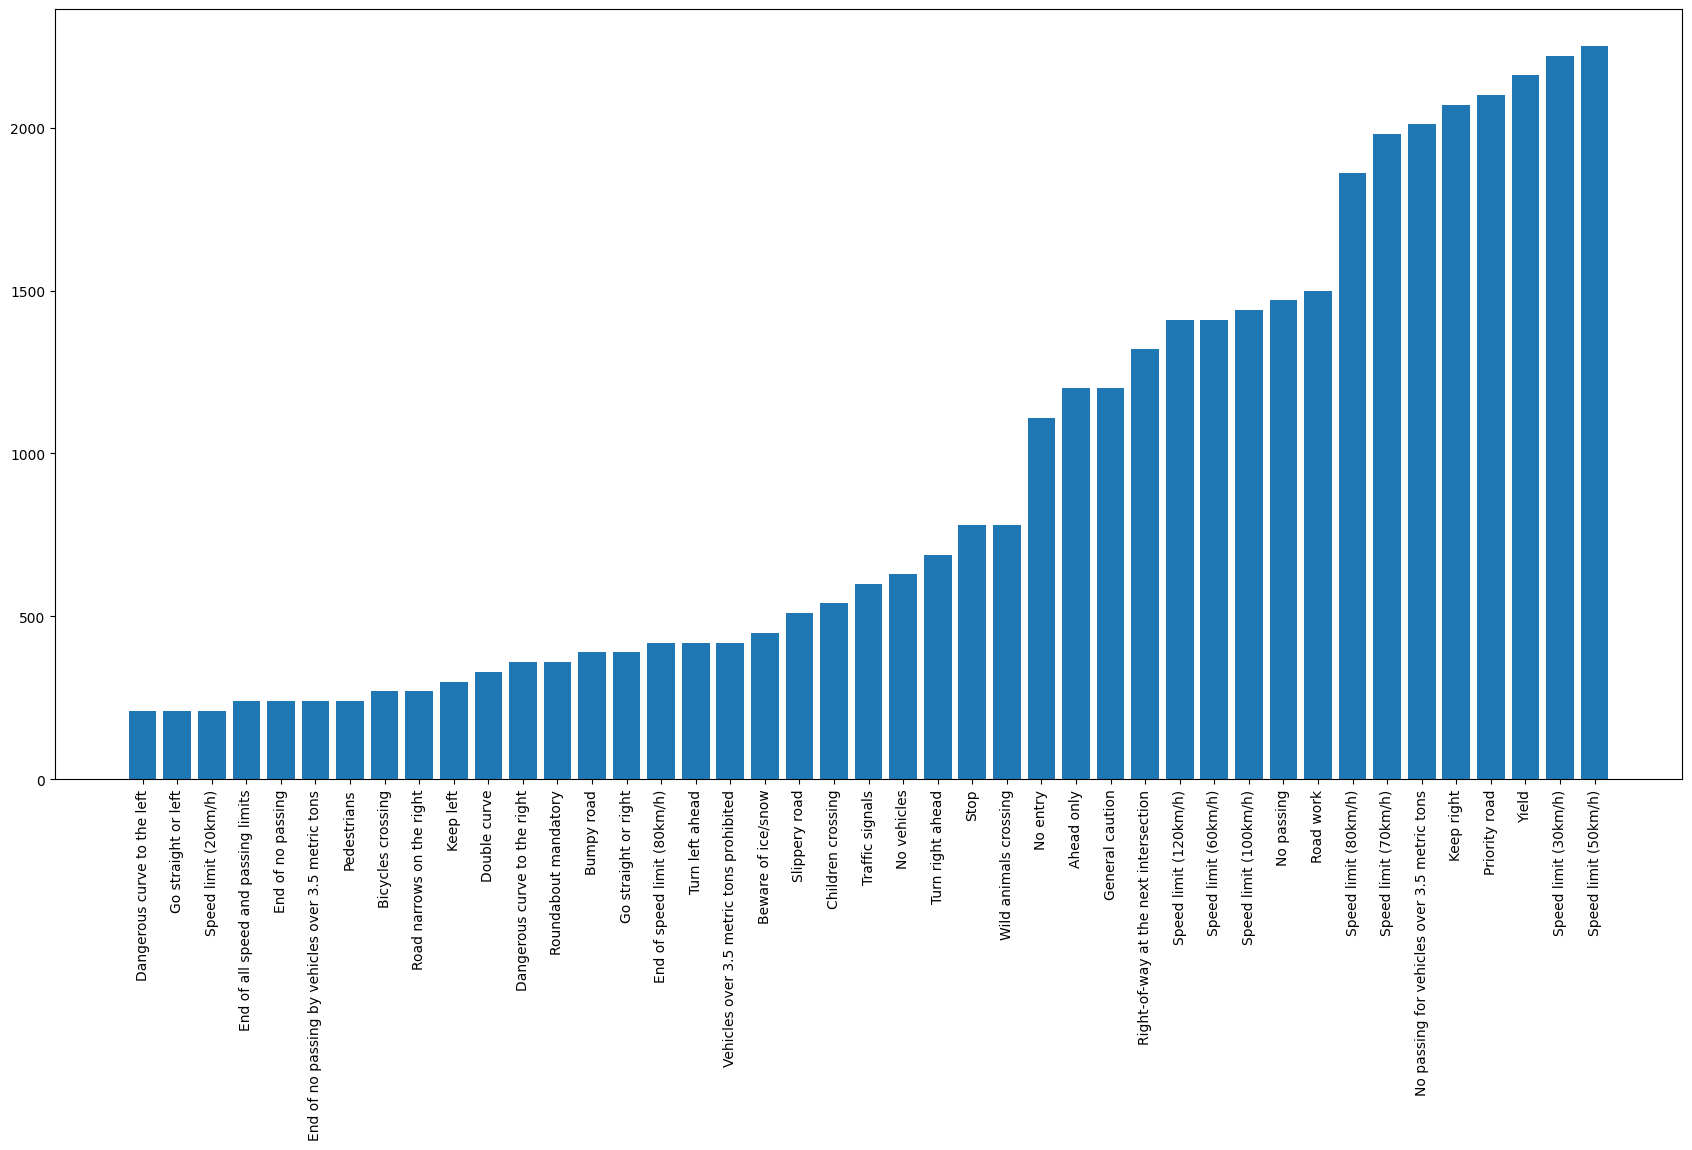

In [ ]:
#Plotting no of samples in each class in sorted order
import os
import matplotlib.pyplot as plt
train_path = '/content/drive/MyDrive/Traffic_Sign_Detection_yolov8/DATAS/GTSRB/Train'
folders = os.listdir(train_path)
train_number = []
class_num = []
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classNames[int(folder)])
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
trainX[0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(trainX[0])

In [ ]:
plt.imshow(trainX[50])

In [ ]:
trainY[50]

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
classNames[trainY[50]]

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

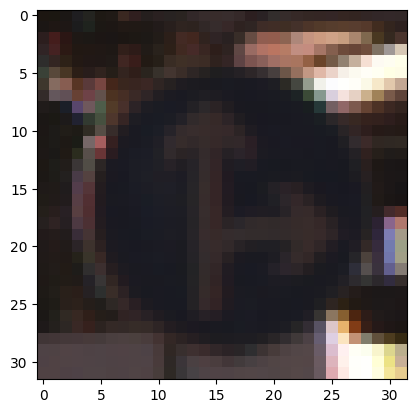

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Go straight or right'

In [ ]:
from sklearn.preprocessing import LabelBinarizer

trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
# 255
# 1
trainX[0]

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

width = 32
height = 32
classes = 43

shape = (width, height, 3)
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [ ]:
aug = ImageDataGenerator(rotation_range=0.10, #xoay hình ảnh
                         zoom_range=0.15, #zoom hình ảnh
                         width_shift_range=0.1, #dịch chuyển hình ảnh theo chiều rộng
                         height_shift_range=0.1,#dịch chuyển hình ảnh theo chiều cao
                         shear_range=0.15, #làm méo ảnh
                         vertical_flip=False, #lật dọc hình ảnh
                         horizontal_flip=False) #lật ngang hình ảnh.

In [ ]:
learning_rate = 0.01
epochs = 50
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/50


<ipython-input-35-96a4836c8487>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)


543/543 [==============================] - 37s 45ms/step - loss: 0.8757 - accuracy: 0.7486 - val_loss: 0.3537 - val_accuracy: 0.8873
Epoch 2/50
543/543 [==============================] - 25s 45ms/step - loss: 0.1152 - accuracy: 0.9690 - val_loss: 0.1953 - val_accuracy: 0.9474
Epoch 3/50
543/543 [==============================] - 26s 47ms/step - loss: 0.0526 - accuracy: 0.9859 - val_loss: 0.2020 - val_accuracy: 0.9420
Epoch 4/50
543/543 [==============================] - 23s 43ms/step - loss: 0.0326 - accuracy: 0.9919 - val_loss: 0.2297 - val_accuracy: 0.9408
Epoch 5/50
543/543 [==============================] - 26s 48ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.1401 - val_accuracy: 0.9692
Epoch 6/50
543/543 [==============================] - 24s 45ms/step - loss: 0.0176 - accuracy: 0.9960 - val_loss: 0.1118 - val_accuracy: 0.9753
Epoch 7/50
543/543 [==============================] - 27s 49ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.1161 - val_accuracy: 0.9732
Epo

395/395 [==============================] - 1s 3ms/step
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.98      0.99        60
                              Speed limit (30km/h)       0.97      1.00      0.98       720
                              Speed limit (50km/h)       0.98      0.98      0.98       750
                              Speed limit (60km/h)       0.99      0.96      0.98       450
                              Speed limit (70km/h)       1.00      0.98      0.99       660
                              Speed limit (80km/h)       0.97      0.99      0.98       630
                       End of speed limit (80km/h)       0.97      0.96      0.96       150
                             Speed limit (100km/h)       0.99      0.99      0.99       450
                             Speed limit (120km/h)       0.99      0.98      0.99       450
                        

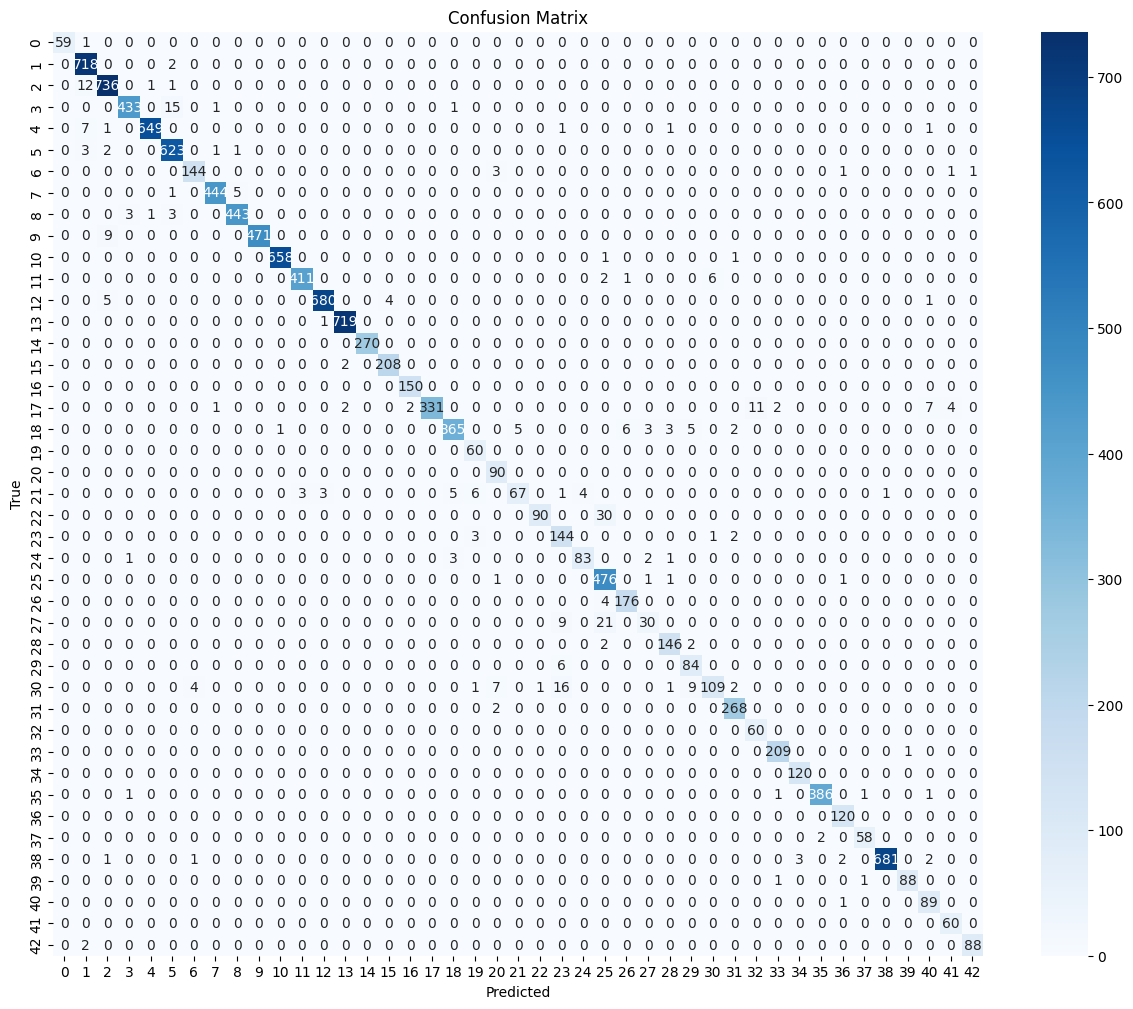

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

# Chuyển đổi nhãn thực tế thành one-hot encoding
testY_one_hot = to_categorical(testY, num_classes=43)

# Dự đoán xác suất cho từng lớp
y_pred_prob = model.predict(testX)

# Chọn lớp có xác suất cao nhất
y_pred = np.argmax(y_pred_prob, axis=1)

# Chuyển đổi nhãn từ one-hot encoding sang nhãn thực tế
y_true = np.argmax(testY_one_hot, axis=1)

# Tính classification report
report = classification_report(y_true, y_pred, target_names=list(classNames.values()))
print(report)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classNames, yticklabels=classNames)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Vẽ biểu đồ Loss và Accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy')

# Vẽ biểu đồ Confusion Matrix (giả sử bạn đang làm bài toán phân loại)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Sử dụng mô hình để dự đoán trên tập kiểm tra
y_pred = model.predict(validX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(validY, axis=1)

# Tính ma trận nhầm lẫn (confusion matrix)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(16, 12))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Hiển thị tất cả các biểu đồ
plt.show()


In [ ]:
model.save("CNN_BEST.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


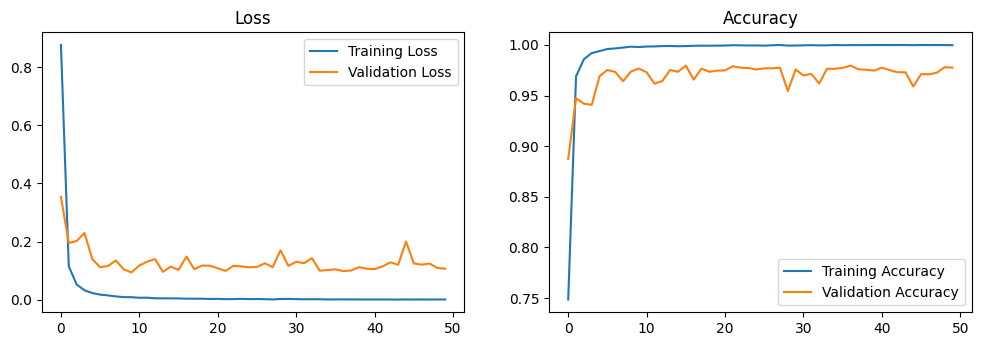

In [ ]:
import matplotlib.pyplot as plt

# Lấy thông tin lịch sử từ model.fit_generator
history = H

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Vẽ biểu đồ accuracy trong quá trình huấn luyện
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [ ]:
saved_model = tf.keras.models.load_model("CNN_BEST.h5")

1/1 [==============================] - 0s 368ms/step


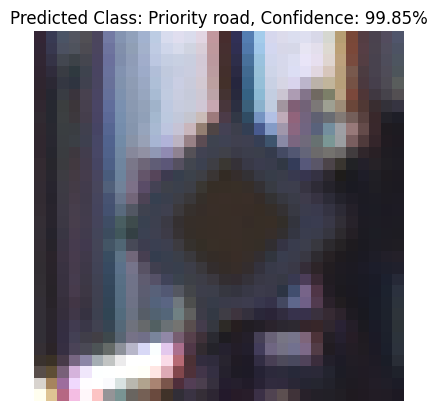

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load tệp mô hình đã được huấn luyện
model = keras.models.load_model('CNN_BEST.h5')  # Thay đổi đường dẫn tới tệp mô hình

# Đoạn mã để dự đoán hình ảnh từ dãy testX
index_to_predict = 10  # Thay đổi index tùy theo hình ảnh bạn muốn dự đoán
img_to_predict = testX[index_to_predict]  # Lấy hình ảnh từ dãy testX


# Chuyển đổi hình ảnh thành mảng NumPy và thực hiện dự đoán
img_array = np.expand_dims(img_to_predict, axis=0)
predictions = model.predict(img_array)

# Lấy nhãn dự đoán và phần trăm nhận diện cao nhất
predicted_class = np.argmax(predictions)
confidence = predictions[0][predicted_class] * 100

# Lấy tên lớp tương ứng với nhãn dự đoán
predicted_class_name = classNames[predicted_class]

# Hiển thị hình ảnh và thông tin dự đoán
plt.imshow(img_to_predict)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_name}, Confidence: {confidence:.2f}%')
plt.show()



In [ ]:
result = saved_model.predict(testX[100:101])

1/1 [==============================] - 0s 126ms/step


In [ ]:
result

array([[4.66952743e-09, 9.99997258e-01, 1.44174422e-07, 1.45511175e-12,
        6.06981985e-07, 1.49213593e-11, 4.10005940e-09, 5.19896082e-09,
        1.78237985e-06, 8.65188407e-11, 2.37903898e-11, 1.24571742e-09,
        8.27270891e-11, 1.29258257e-08, 3.82914722e-09, 5.92723592e-10,
        3.41922435e-10, 2.57901756e-10, 7.53841700e-09, 9.85281509e-11,
        3.59920427e-12, 1.05319274e-10, 7.49208126e-11, 6.30812277e-11,
        4.98437913e-08, 2.88254004e-10, 5.36438706e-11, 3.20232707e-09,
        6.95518754e-09, 1.16290055e-09, 1.50700197e-09, 4.55337365e-11,
        2.31039687e-10, 1.51220633e-11, 4.41769021e-09, 2.81598189e-09,
        1.93213653e-10, 4.18191739e-08, 6.69945696e-11, 2.50705376e-08,
        2.23227516e-08, 1.36117462e-09, 4.51276308e-11]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

'Speed limit (30km/h)'

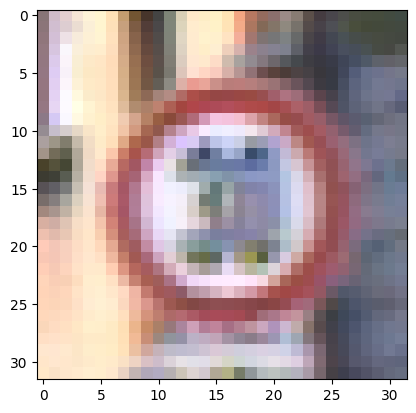

In [ ]:
plt.imshow(test["features"][100])